In [3]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft, ifft, fftshift,fftfreq, ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
from matplotlib import animation
import tqdm
from IPython.display import HTML

In [4]:
data = pd.read_csv('../data/my_dataset.txt', sep='\s+',header=None)

In [5]:
data.head()

,0,1,2
0,13463209,0.99319,15
1,13464268,1.00190,15
2,13466769,1.00700,15
3,13469274,1.00380,15
4,13471782,1.01250,15


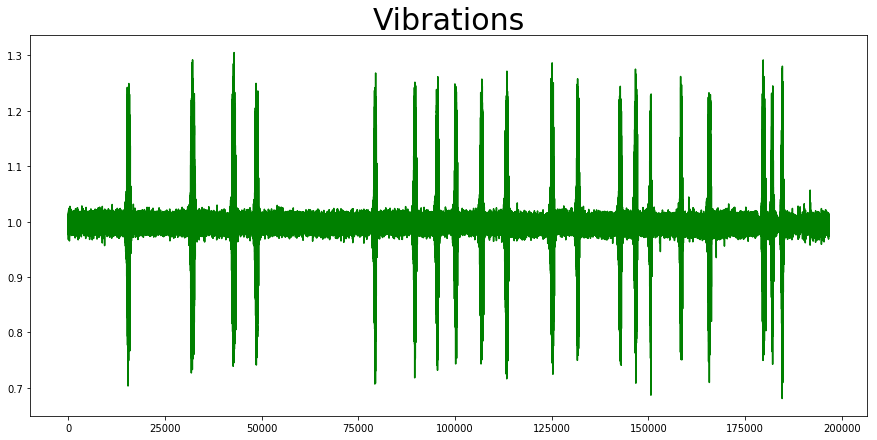

In [6]:
plt.figure(figsize=(15,7))
y = data[1]
x_d = np.linspace(0, len(y), len(y), endpoint=True)
plt.title('Vibrations', fontsize=30)
plt.plot(x_d, y, color='green')
plt.show()

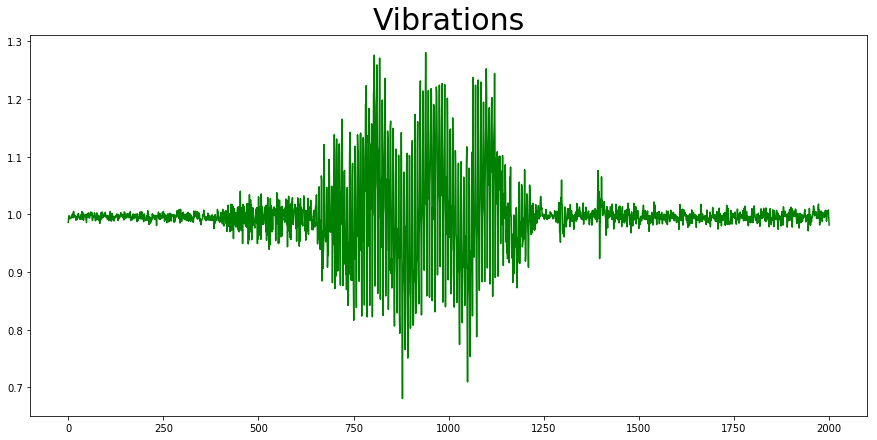

In [188]:
plt.figure(figsize=(15,7))
y = data[1][183700:185700]
x_d = np.linspace(0, len(y), len(y), endpoint=True)
plt.title('Vibrations', fontsize=30)
plt.plot(x_d, y, color='green')
plt.show()

In [7]:
real_strikes = [
    (1, data[1][14500:16500]),
    (2, data[1][31000:33000]),
    (3, data[1][41700:43700]),
    (4, data[1][47500:49500]),
    (5, data[1][78200:80200]),
    (6, data[1][88500:90500]),
    (7, data[1][94300:96300]),
    (8, data[1][99100:101100]),
    (9, data[1][105800:107800]),
    (10, data[1][112300:114300]),
    (11, data[1][124000:126000]),
    (12, data[1][130750:132750]),
    (13, data[1][141600:143600]),
    (14, data[1][145700:147700]),
    (15, data[1][149500:151500]),
    (16, data[1][157500:159500]),
    (17, data[1][164500:166500])
]
fake_strikes = [
    (1, data[1][178800:180800]),
    (2, data[1][181000:183000]),
    (3, data[1][183700:185700])
]

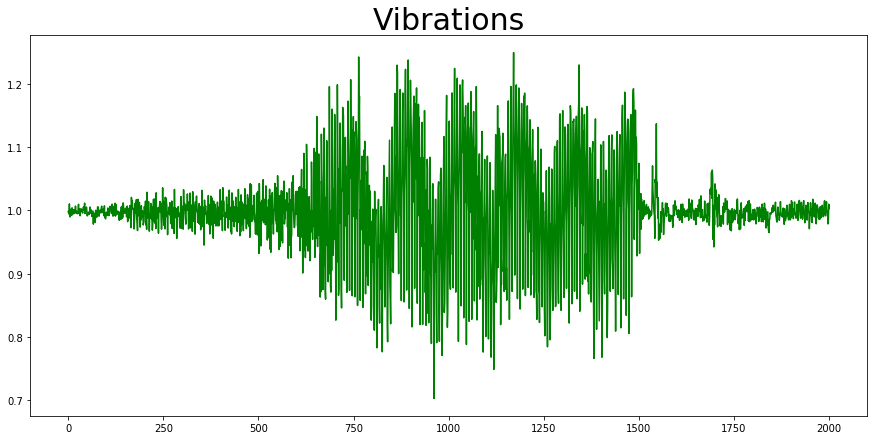

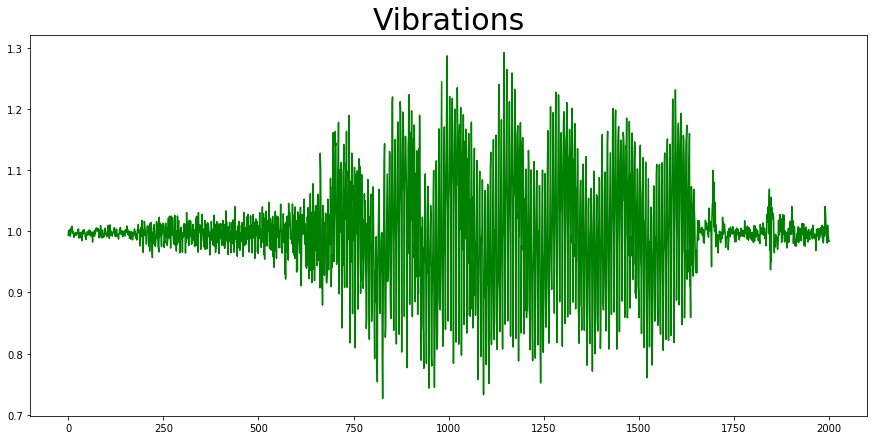

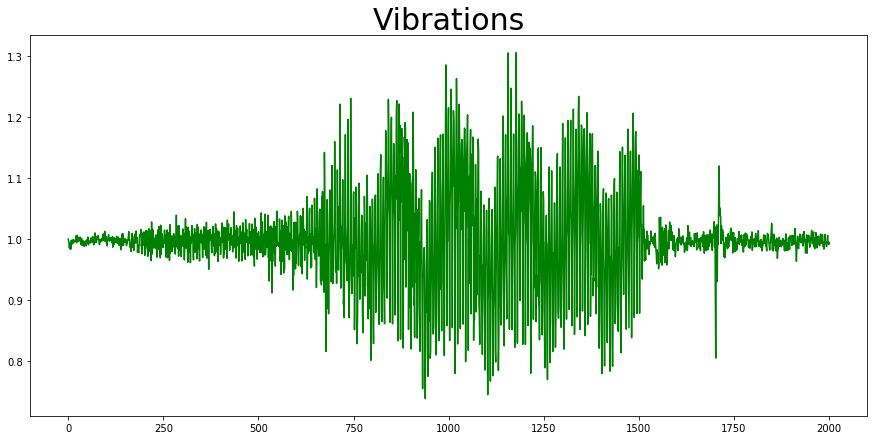

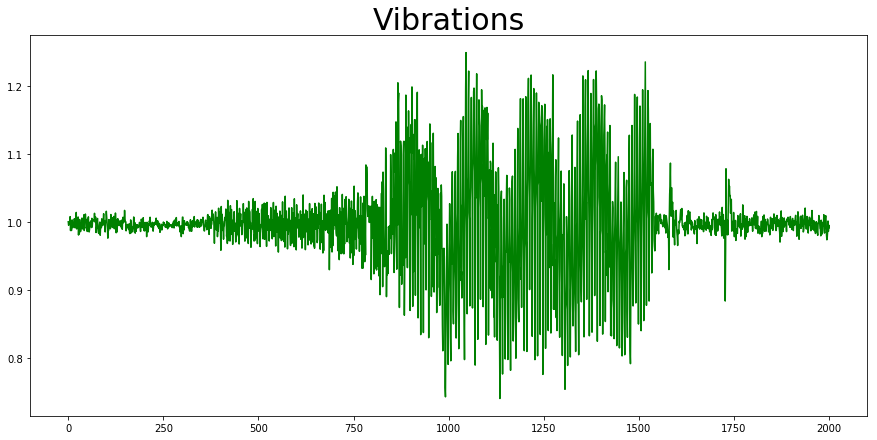

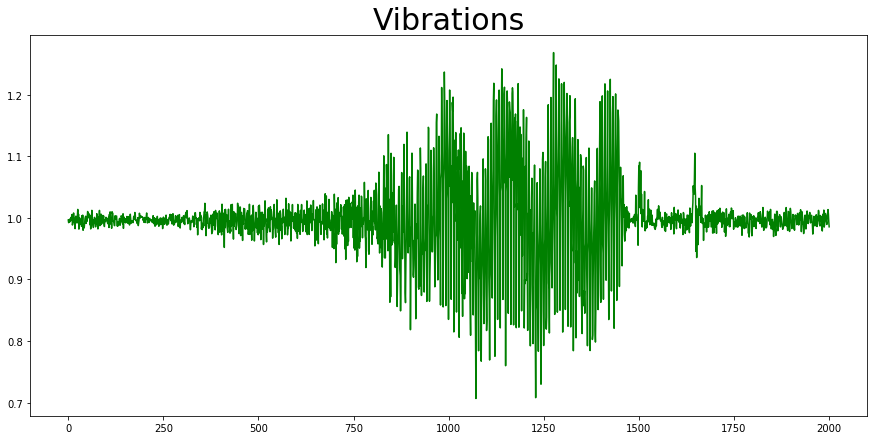

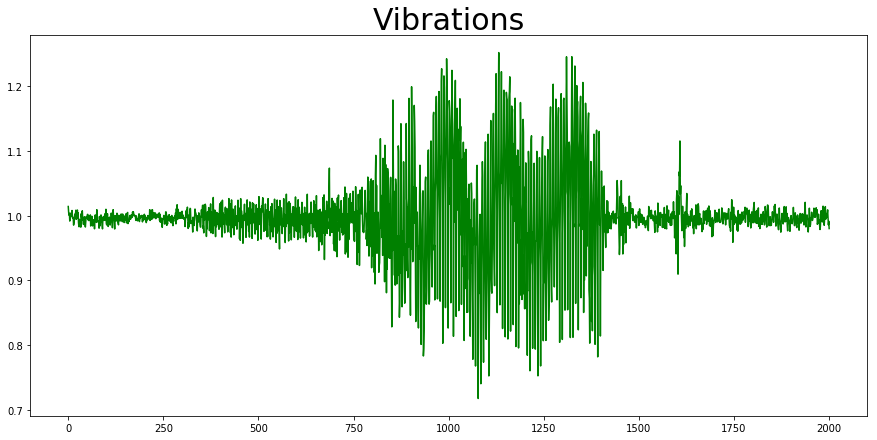

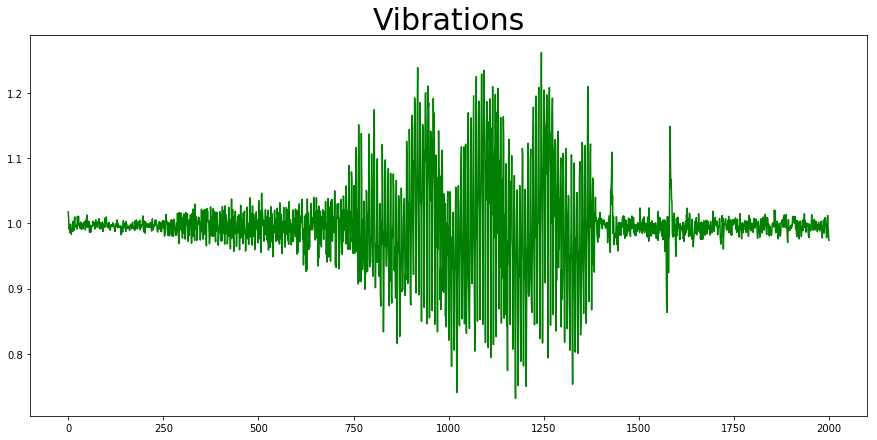

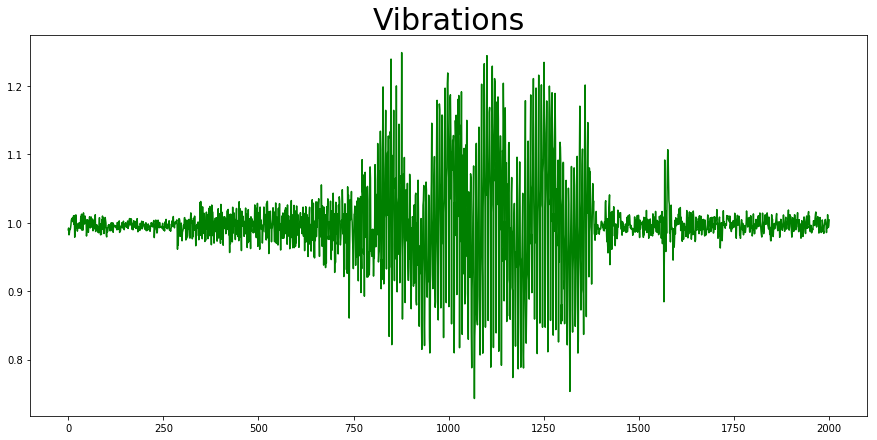

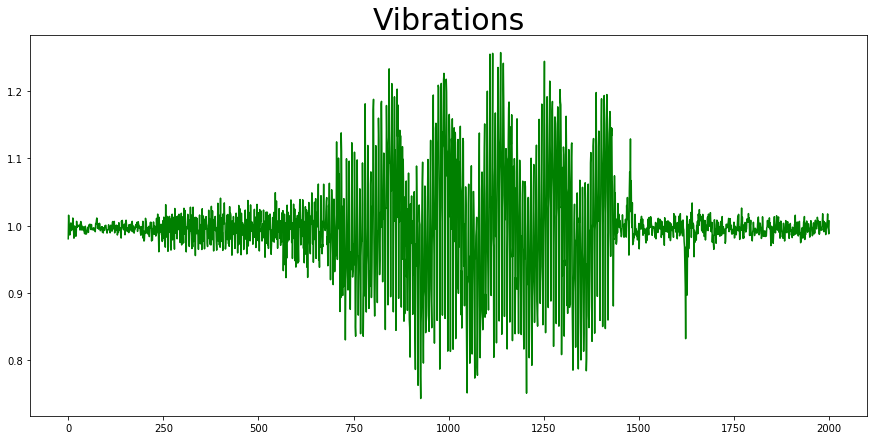

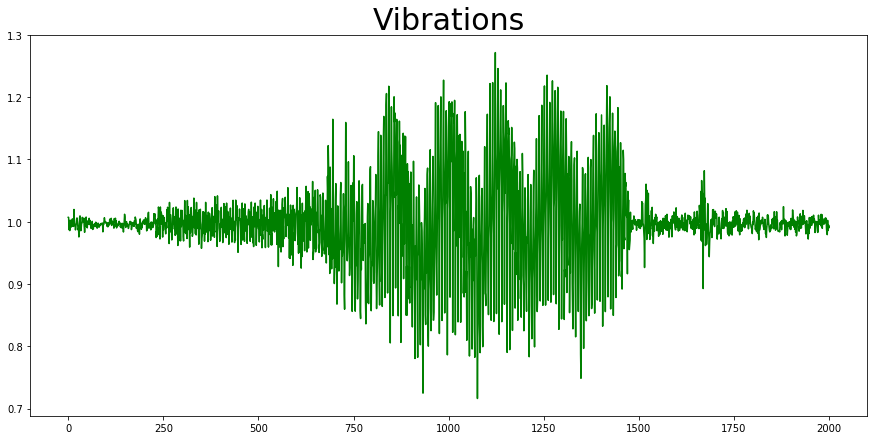

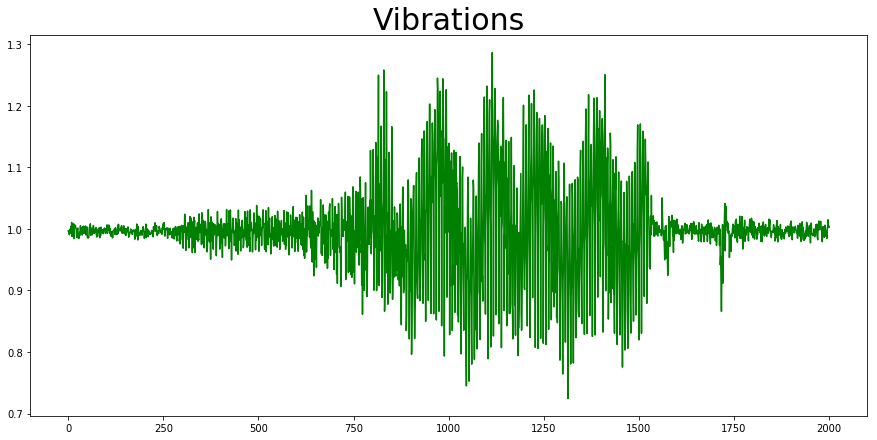

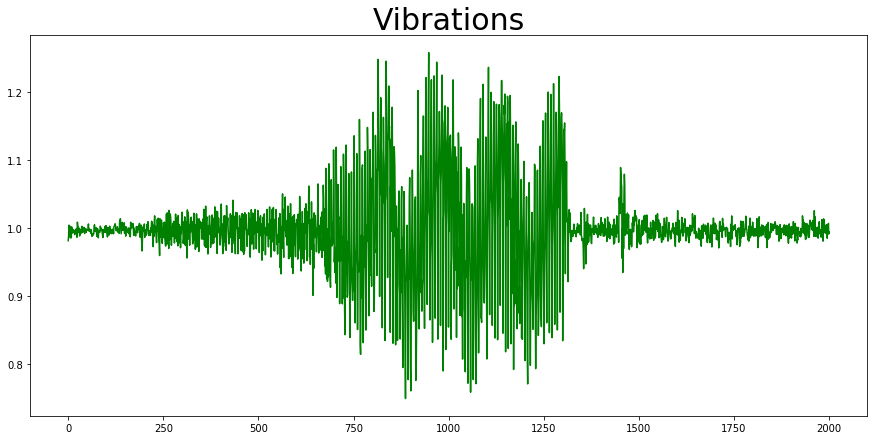

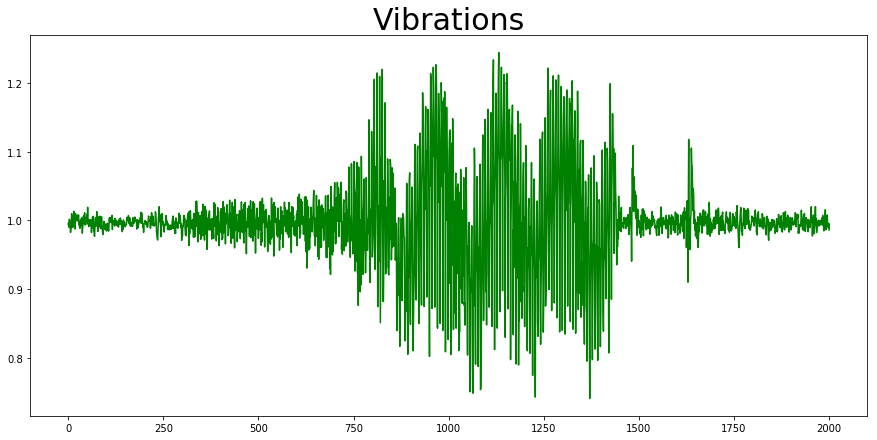

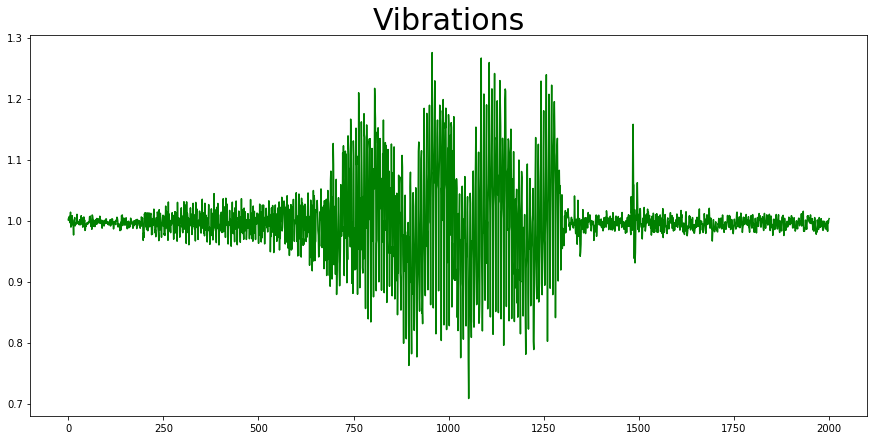

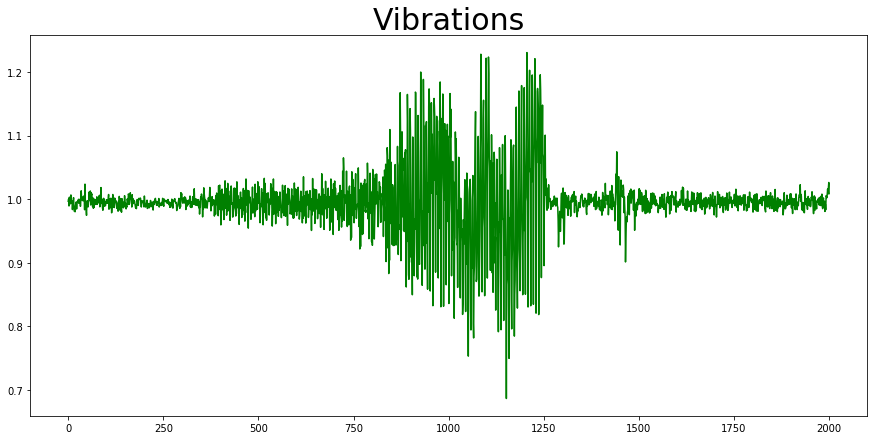

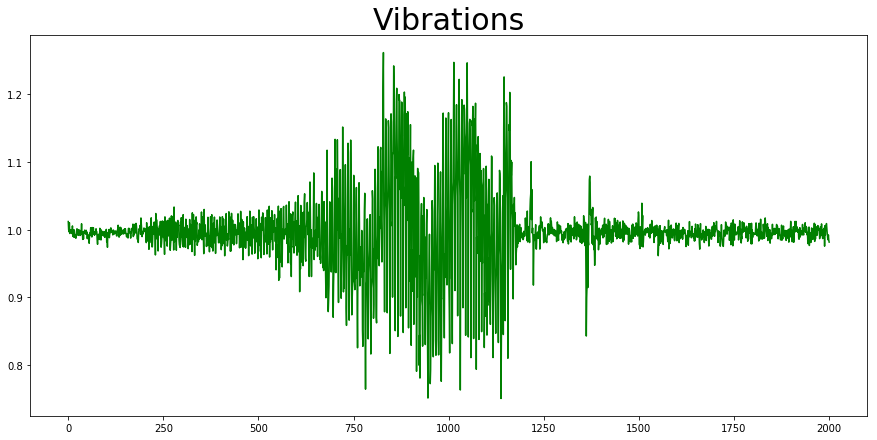

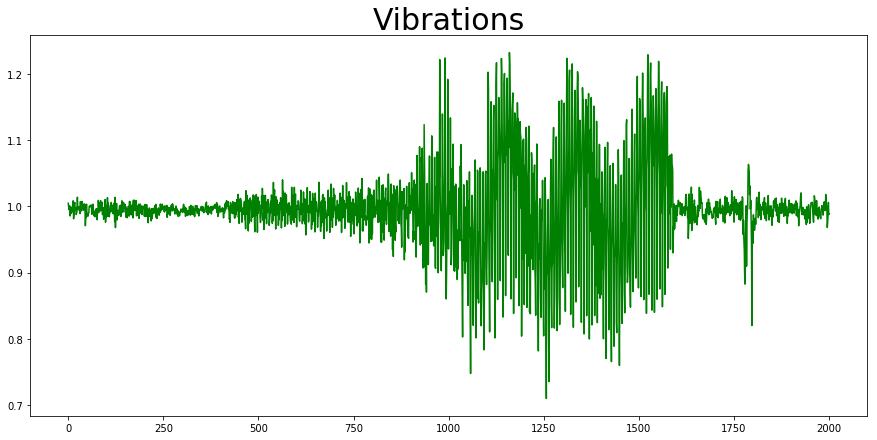

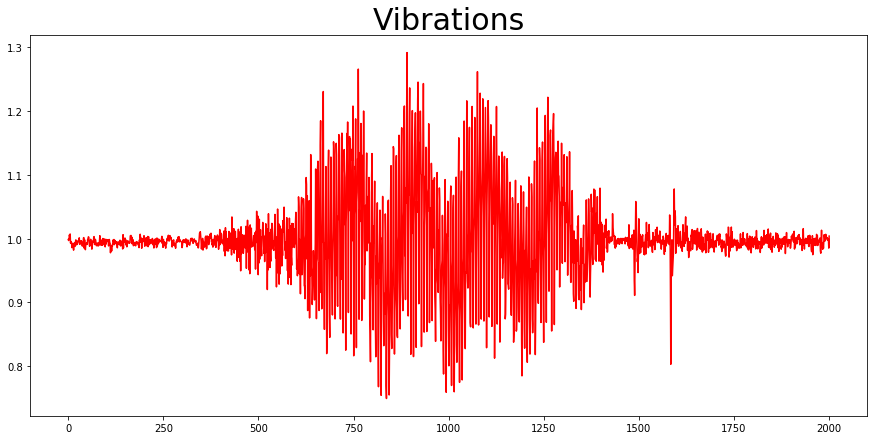

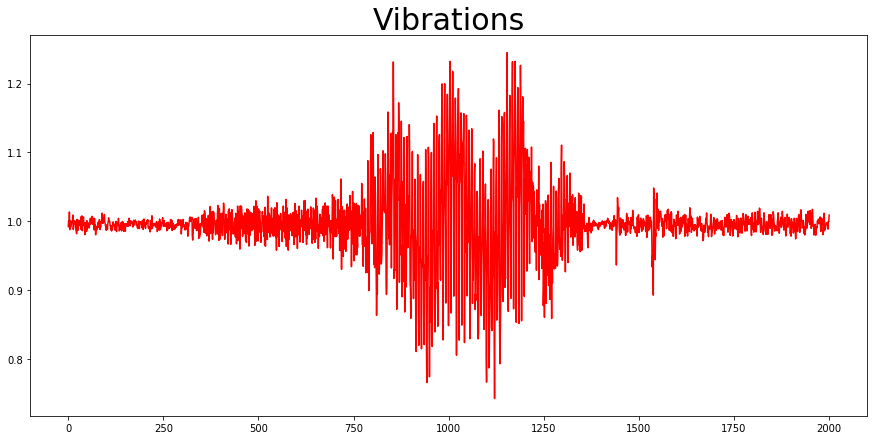

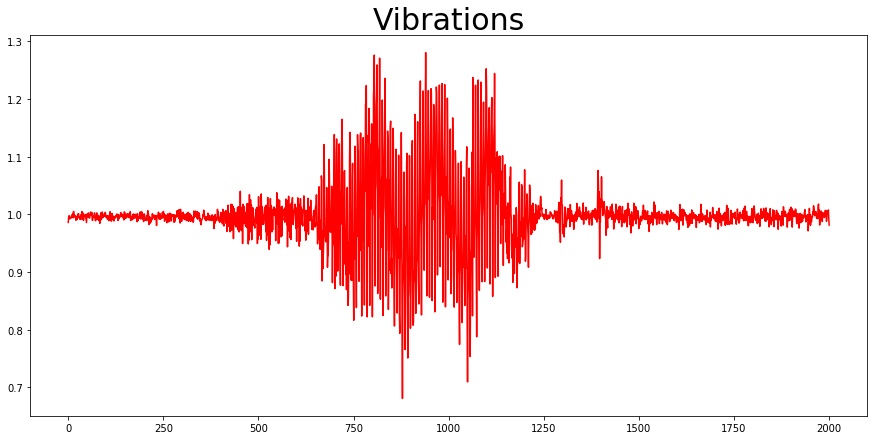

In [195]:
for i in range(len(real_strikes)):   
    plt.figure(figsize=(15,7))
    y = real_strikes[i][1]
    x_d = np.linspace(0, len(y), len(y), endpoint=True)
    plt.title('Vibrations', fontsize=30)
    plt.plot(x_d, y, color='green')

for i in range(len(fake_strikes)):
    plt.figure(figsize=(15,7))
    y = fake_strikes[i][1]
    x_d = np.linspace(0, len(y), len(y), endpoint=True)
    plt.title('Vibrations', fontsize=30)
    plt.plot(x_d, y, color='red')
plt.show()

In [5]:
def fourier_transform(x, window_size, stride):
    """
    Args:
     - x: input data;
     - window_size: size of the sliding window;
     - stride: stride of the sliding window;
    
    Return:
     - tuple: (original data, fourier_transromation)
    """
    original_data = list()
    fourier_transformation = list()
    index = 0
    for i in range(len(x) - window_size):
        cur_window = x[index:index + window_size]
        if len(cur_window) == 0:
            break
        fourier = fft(cur_window)
        original_data.append(cur_window)
        fourier_transformation.append(fourier)
        index += stride
    return (original_data, fourier_transformation)

In [6]:
window_size = 300
stride = 10

In [8]:
ff = fft(real_strikes[0][1])
norm_of_the_harmonicas_curr_strike = [np.linalg.norm(k) for k  in ff]

In [23]:
import seaborn
import seaborn as sns

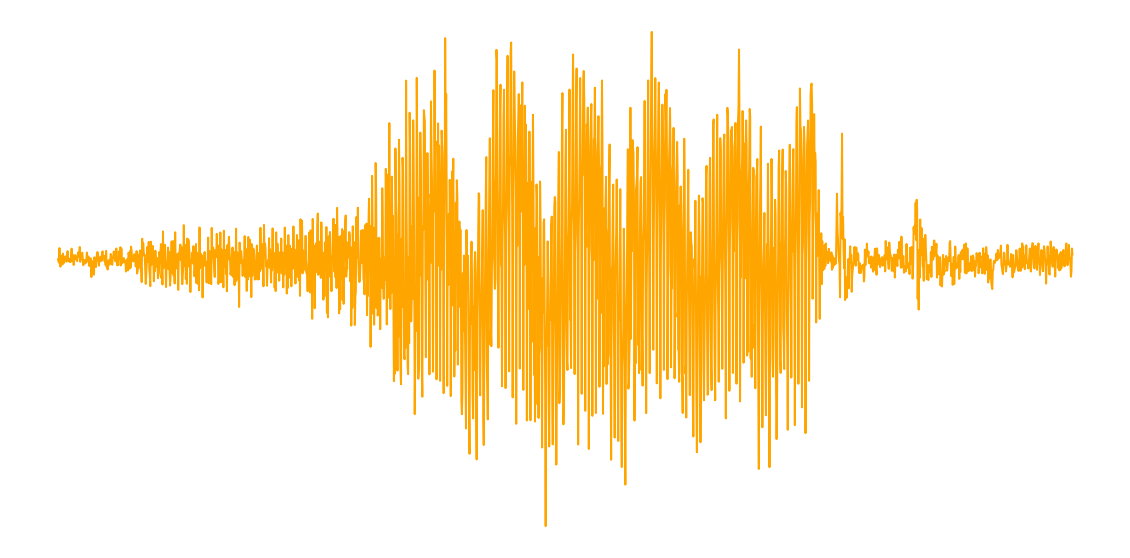

In [66]:
sns.set_style("white")
plt.figure(figsize=(20,10))
plt.plot(real_strikes[0][1], color='orange', linewidth=2)
plt.xticks([])
plt.yticks([])
sns.despine(left=True, bottom=True)

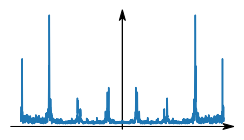

In [42]:
import pylab as pl

fig = pl.figure()
ax = fig.add_subplot(111)

x = [x + 1 for x in norm_of_the_harmonicas_curr_strike[1:]]
y = np.linspace(-1000, 999, 1999)
ax.plot(y,x)

xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# removing the default axis on all sides:
for side in ['bottom','right','top','left']:
    ax.spines[side].set_visible(False)

# removing the axis ticks
pl.xticks([]) # labels
pl.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# wider figure for demonstration
fig.set_size_inches(4,2.2)

# get width and height of axes object to compute
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

# manual arrowhead width and length
hw = 1./20.*(ymax-ymin)
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang

# compute matching arrowhead length and width
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

# draw x and y axis
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw,
         head_width=hw, head_length=hl, overhang = ohg,
         length_includes_head= True, clip_on = False)

ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw,
         head_width=yhw, head_length=yhl, overhang = ohg,
         length_includes_head= True, clip_on = False)

# clip_on = False if only positive x or y values.

pl.savefig('arrow_axis.png', dpi = 300)

In [34]:
xmin, xmax, ymin, ymax

(-99.95, 2098.95, -22.083903667135942, 24.020641249356864)